In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [3]:
df= pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
print(df.shape)
df.head(2)

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


In [4]:
df.info()  # check for nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
# dropping serial no column
df.drop(columns=['Serial No.'],inplace=True)
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.iloc[:,:-1],df.iloc[:,-1]
                                                ,test_size=0.2,random_state=2)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
428,316,103,2,2.0,4.5,8.74,0
490,307,105,2,2.5,4.5,8.12,1
53,324,112,4,4.0,2.5,8.10,1
336,319,110,3,3.0,2.5,8.79,0
154,326,108,3,3.0,3.5,8.89,0
...,...,...,...,...,...,...,...
22,328,116,5,5.0,5.0,9.50,1
72,321,111,5,5.0,5.0,9.45,1
493,300,95,2,3.0,1.5,8.22,1
15,314,105,3,3.5,2.5,8.30,0


In [33]:
# do min_max_scaling as most of the column values have fixed range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.85106383,  0.92592593,  1.        ,  1.        ,  1.        ,
         0.81730769,  1.        ],
       [ 0.38297872,  0.33333333,  0.5       ,  0.875     ,  0.75      ,
         0.58974359,  1.        ],
       [ 0.25531915,  0.40740741,  0.25      ,  0.375     ,  0.125     ,
         0.31730769,  0.        ],
       [ 1.        ,  0.74074074,  0.75      ,  1.        ,  1.        ,
         0.94230769,  1.        ],
       [ 0.06382979,  0.22222222,  0.25      ,  0.375     ,  0.375     ,
         0.39423077,  0.        ],
       [ 0.46808511,  0.40740741,  0.5       ,  0.75      ,  0.375     ,
         0.41666667,  0.        ],
       [ 0.65957447,  0.51851852,  0.75      ,  0.75      ,  0.875     ,
         0.66346154,  1.        ],
       [ 0.34042553,  0.44444444,  0.25      ,  0.375     ,  0.75      ,
         0.28205128,  0.        ],
       [ 0.23404255,  0.14814815,  0.25      ,  0.125     ,  0.25      ,
         0.26923077,  0.        ],
       [ 0.25531915,  0.4444

In [34]:
# build NN architecture
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [61]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear')) # for regression activation is linear

In [62]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 7)                 56        
                                                                 
 dense_20 (Dense)            (None, 7)                 56        
                                                                 
 dense_21 (Dense)            (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [63]:
model.compile(loss='mean_squared_error',optimizer='Adam')
#               ,metrics=['Accuracy'])

In [64]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 20ms/step - loss: 0.6804 - val_loss: 0.6378
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6050 - val_loss: 0.5717
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5443 - val_loss: 0.5196
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5000 - val_loss: 0.4794
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4607 - val_loss: 0.4379
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4189 - val_loss: 0.3934
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3746 - val_loss: 0.3489
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3305 - val_loss: 0.3044
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2858 - val_loss: 0.2602
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2416 - val_loss: 0.2166
Epoch 11

In [65]:
y_prob = model.predict(X_test_scaled)
# y_prob

4/4 [==============================] - 0s 3ms/step


In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prob)

0.7562958344305615

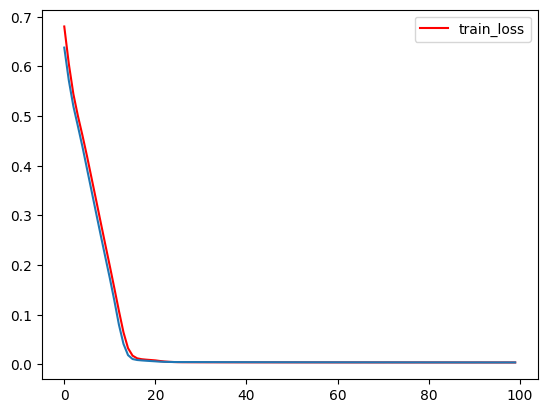

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='Red',label="train_loss")
plt.plot(history.history['val_loss'])
plt.legend()

In [78]:
# Save the pickle file
import pickle
pickle.dump(model,open('Graduate_Admission_Prediction_pickle_file.pkl','wb',))